In [8]:
###########################
# AE 모델링
###########################
from keras import layers, models  # (Input, Dense), (Model)


class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # Encoder, Decoder ??

        self.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        encoded_input  = layers.Input(shape=(self.z_dim,))
        decoder_layer = self.layers[-1]
        decoder = decoder_layer(encoded_input)
        return models.Model(encoded_input, decoder )

In [9]:
###########################
# 데이터 준비
###########################
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
###########################
# 학습 효과 분석
###########################
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

In [11]:
###########################
# AE 동작 확인
###########################
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [12]:
###########################
# 학습
###########################
def main():
    x_nodes = 784
    z_dim = 36

    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(X_train, X_train,
                              epochs=10,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(X_test, X_test))

    plot_acc(history, '(a) 학습 경과에 따른 정확도 변화 추이')
    plt.show()
    plot_loss(history, '(b) 학습 경과에 따른 손실값 변화 추이')
    plt.show()

    show_ae(autoencoder)
    plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2446 - accuracy: 0.7894 - val_loss: 0.1800 - val_accuracy: 0.8010
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1673 - accuracy: 0.8035 - val_loss: 0.1551 - val_accuracy: 0.8051
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1490 - accuracy: 0.8065 - val_loss: 0.1410 - val_accuracy: 0.8069
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1377 - accuracy: 0.8083 - val_loss: 0.1318 - val_accuracy: 0.8084
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1295 - accuracy: 0.8096 - val_loss: 0.1247 - val_accuracy: 0.8095
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1230 - accuracy: 0.8106 - val_loss: 0.1188 - val_accuracy: 0.8103
Epoch 7/10
60000/60000 [==============================] - 2s 27us/st

C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\e

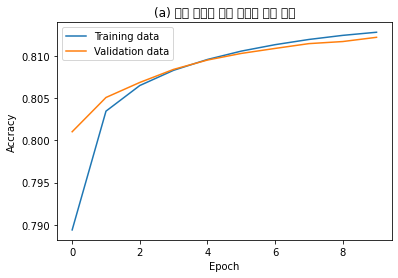

C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tensorflow_py37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\

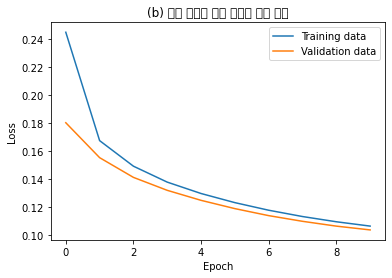

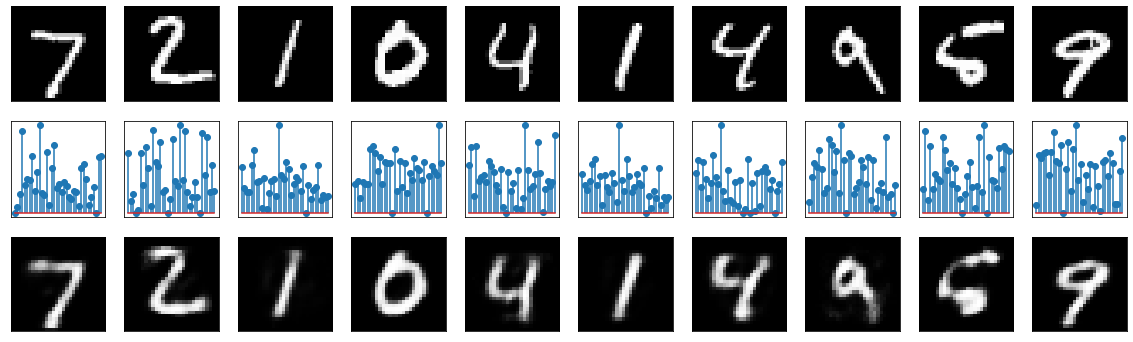

In [14]:
if __name__ == '__main__':
    main()